In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import nfl_data_py as nfl

In [90]:
#accsessing the data and creating the dataframe for qb stats for the model
pbp_data = nfl.import_pbp_data([2020, 2021, 2022, 2023, 2024])

# Filter for pass plays by QBs
qb_plays = pbp_data[
    (pbp_data['play_type'] == 'pass') & 
    (pbp_data['season_type'] == 'REG') & 
    (pbp_data['passer_player_name'].notna())
].copy()

# Aggregate stats
qb_stats = qb_plays.groupby(['season', 'passer_player_id', 'passer_player_name']).agg({
    'complete_pass': 'sum',
    'interception': 'sum',
    'sack': 'sum',
    'yards_gained': 'sum',
    'pass_touchdown': 'sum',
    'play_type': 'count'
}).rename(columns={
    'play_type': 'attempts',
    'pass_touchdown': 'passing_tds',
    'passer_player_name': 'player_name'
}).reset_index()

# Same calculations as above
qb_stats['comp_pct'] = round(qb_stats['complete_pass'] / qb_stats['attempts'] * 100, 1)
qb_stats['ypa'] = round(qb_stats['yards_gained'] / qb_stats['attempts'], 1)
qb_stats['td_int_ratio'] = round(qb_stats['passing_tds'] / (qb_stats['interception'] + 1), 2)
qb_stats['td_rate'] = round(qb_stats['passing_tds'] / qb_stats['attempts'], 3)
qb_stats['int_rate'] = round(qb_stats['interception'] / qb_stats['attempts'], 3)

print(qb_stats.sort_values('yards_gained', ascending=False).head(10))

2020 done.
2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.
     season passer_player_id passer_player_name  complete_pass  interception  \
121    2021       00-0019596            T.Brady          485.0          12.0   
296    2022       00-0033873          P.Mahomes          435.0          12.0   
232    2021       00-0036355          J.Herbert          443.0          15.0   
188    2021       00-0033873          P.Mahomes          436.0          13.0   
133    2021       00-0026498         M.Stafford          404.0          17.0   
544    2024       00-0036442           J.Burrow          460.0           9.0   
73     2020       00-0033873          P.Mahomes          390.0           6.0   
157    2021       00-0031280             D.Carr          428.0          14.0   
245    2022       00-0019596            T.Brady          490.0           9.0   
334    2022       00-0036355          J.Herbert          477.0          10.0   

     sack  yards_gained  passing_tds  attemp

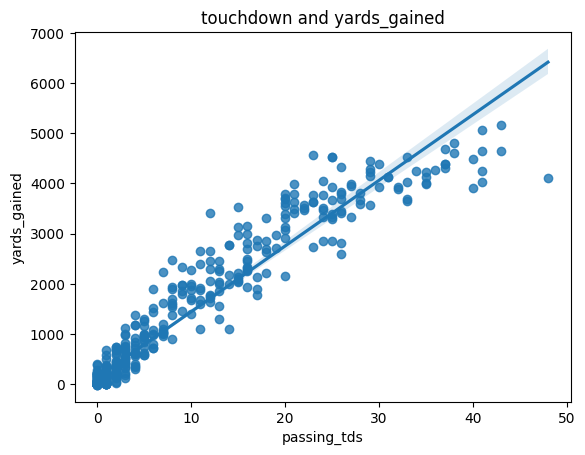

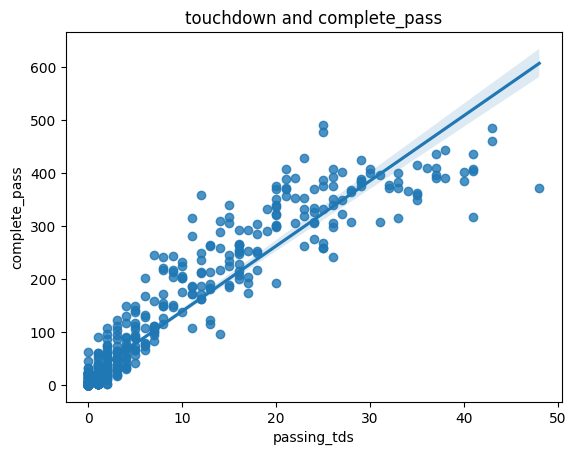

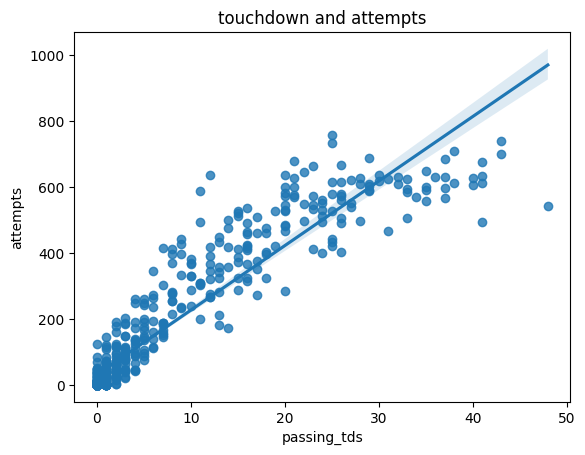

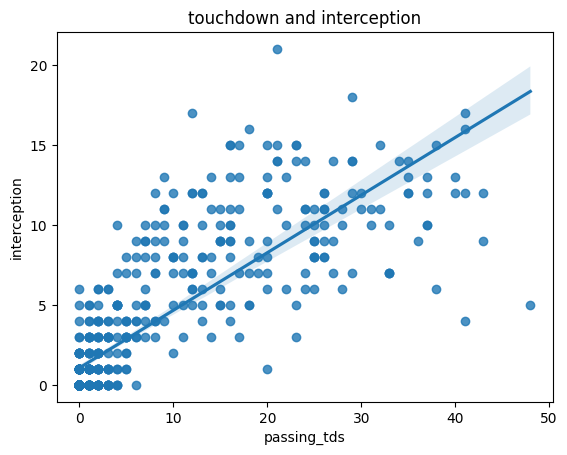

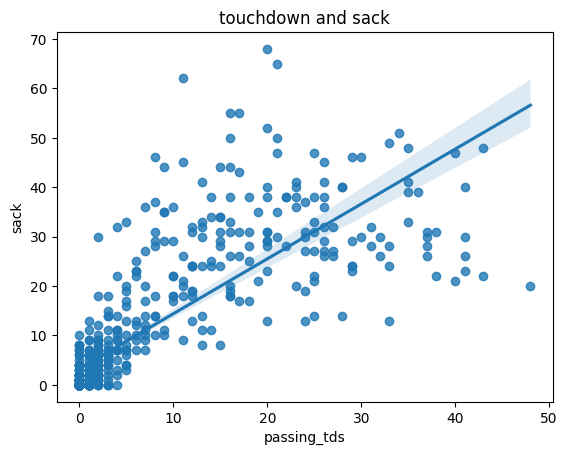

In [91]:
# Plotting the data and seeing the correlation between qb stats and touchdowns thrown
for y in ['yards_gained', 'complete_pass', 'attempts', 'interception', 'sack']:
    sns.regplot(data=qb_stats, x='passing_tds', y=y,)
    plt.title(f"touchdown and {y}")
    plt.show()

In [92]:
#copying the data to create a new column for a predictive model
# This is a simple regression model to predict future performance based on past performance
copy = qb_stats.copy()
copy['season'] = copy['season'].add(1)

new_qb_stats = (qb_stats.merge(copy, on = ['season',
 'passer_player_id', 'passer_player_name'], suffixes=('', '_prev'), how='left'))
new_qb_stats.sample(10)

,season,passer_player_id,passer_player_name,complete_pass,interception,sack,yards_gained,passing_tds,attempts,comp_pct,...,interception_prev,sack_prev,yards_gained_prev,passing_tds_prev,attempts_prev,comp_pct_prev,ypa_prev,td_int_ratio_prev,td_rate_prev,int_rate_prev
124,2021,00-0023459,A.Rodgers,193.0,1.0,13.0,2156.0,20.0,287,67.2,...,5.0,20.0,4117.0,48.0,543.0,68.5,7.6,8.00,0.088,0.009
570,2024,00-0038582,C.Tune,2.0,0.0,0.0,8.0,0.0,2,100.0,...,2.0,7.0,21.0,0.0,28.0,42.9,0.8,0.00,0.000,0.071
454,2023,00-0037304,Co.Heyward,0.0,0.0,0.0,0.0,0.0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,2023,00-0036355,J.Herbert,297.0,7.0,29.0,2903.0,20.0,486,61.1,...,10.0,38.0,4535.0,25.0,736.0,64.8,6.2,2.27,0.034,0.014
143,2021,00-0029000,C.Beasley,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0.0,0.0,20.0,1.0,1.0,100.0,20.0,1.00,1.000,0.000
91,2020,00-0034955,B.Rypien,27.0,4.0,1.0,295.0,2.0,41,65.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,2021,00-0031382,J.Landry,0.0,0.0,1.0,-1.0,0.0,1,0.0,...,0.0,0.0,74.0,1.0,4.0,100.0,18.5,1.00,0.250,0.000
177,2021,00-0033106,J.Goff,332.0,8.0,35.0,2973.0,19.0,529,62.8,...,13.0,23.0,3793.0,20.0,574.0,64.5,6.6,1.43,0.035,0.023
149,2021,00-0030279,K.Allen,0.0,0.0,0.0,2.0,0.0,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.000,0.000
336,2022,00-0036389,J.Hurts,306.0,6.0,38.0,3470.0,22.0,499,61.3,...,9.0,26.0,3000.0,16.0,459.0,57.7,6.5,1.60,0.035,0.020


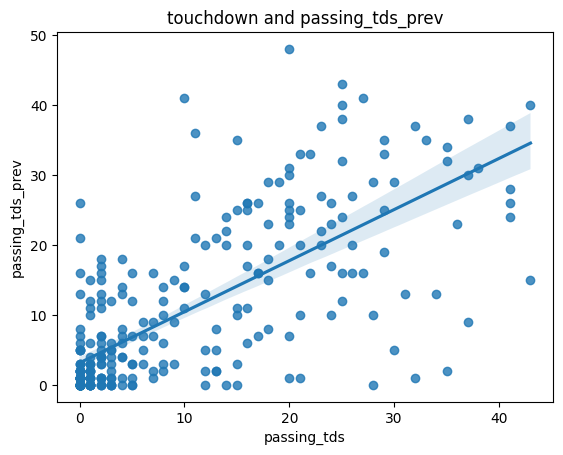

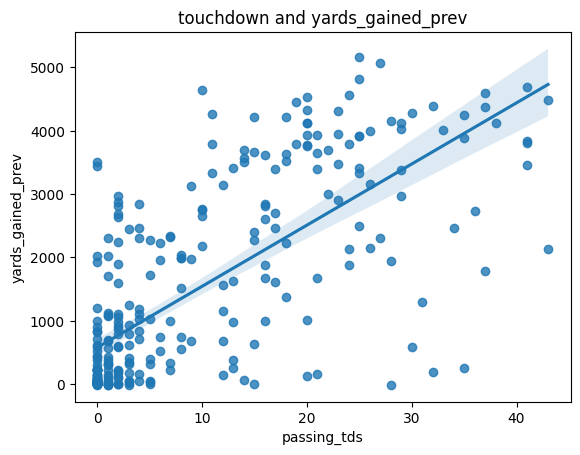

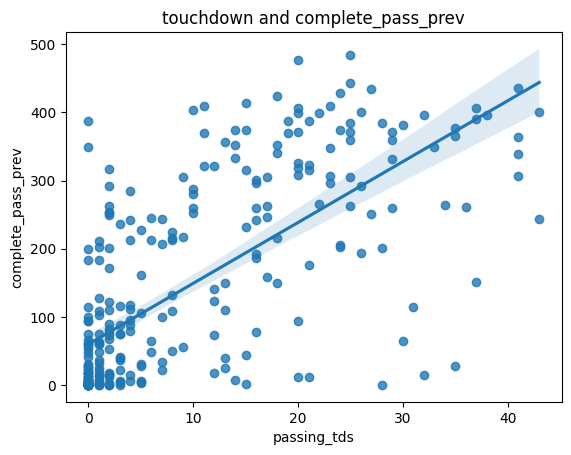

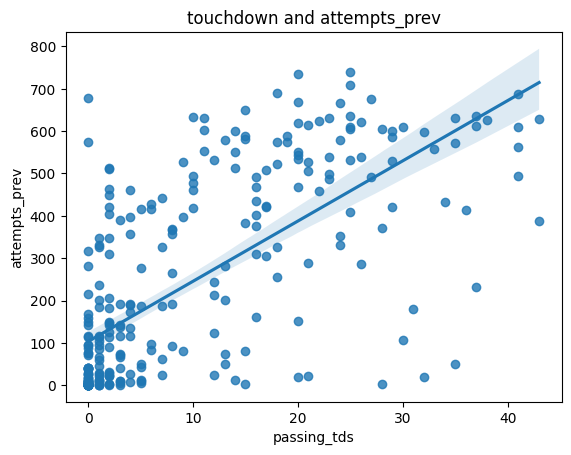

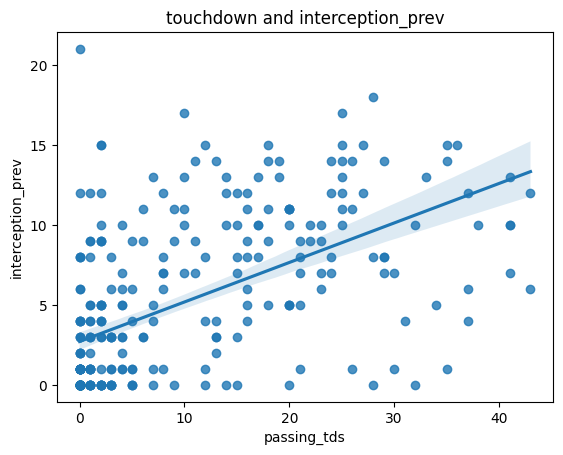

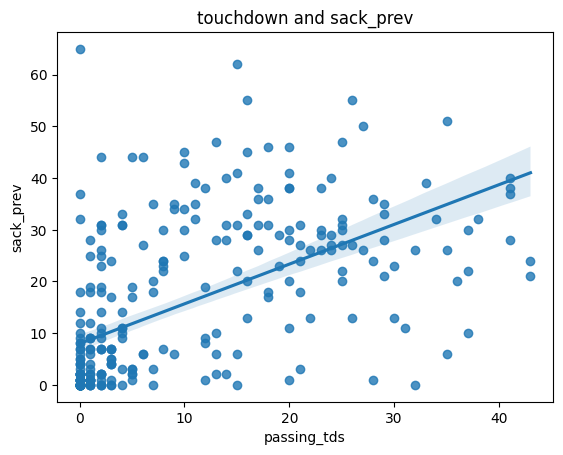

In [93]:
#plotting the data and seeing the correlation between previous qb stats and touchdowns thrown in the current season
for y in ['passing_tds_prev','yards_gained_prev', 'complete_pass_prev', 'attempts_prev', 'interception_prev', 'sack_prev']:
    sns.regplot(data=new_qb_stats, x='passing_tds', y=y,)
    plt.title(f"touchdown and {y}")
    plt.show()

# using the model to Predict 2022 Touchdowns

In [94]:
#loading in the machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

#training the model
features = ['passing_tds_prev','yards_gained_prev', 'complete_pass_prev', 'td_rate_prev',
             'interception_prev', 'int_rate_prev', 'ypa_prev', 'sack_prev', 'comp_pct_prev']
target = 'passing_tds'

# Creating a subset with no null values (especially for _prev columns)
model_data = new_qb_stats.dropna(subset=features + [target]).copy() # Use .copy() for better code practice

# Filter out players with too few previous attempts
min_prev_attempts = 1
qb_stats_filtered = new_qb_stats[new_qb_stats['attempts_prev'] >= min_prev_attempts]

# Then, use qb_stats_filtered to create model_data
model_data = qb_stats_filtered.dropna(subset=features + [target]).copy()

#train on 2021 data
train_data = (model_data.loc[model_data['season'] < 2022])

#test on 2022 data
test_data = (model_data.loc[model_data['season']==2022])

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

#running some statistics on the model to see how well it performed
rmse = mean_squared_error(test_data[target], test_data['predictions'])**0.5
r2 = pearsonr(test_data[target], test_data['predictions'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 6.904484417833103
r2: 0.6134648270502397


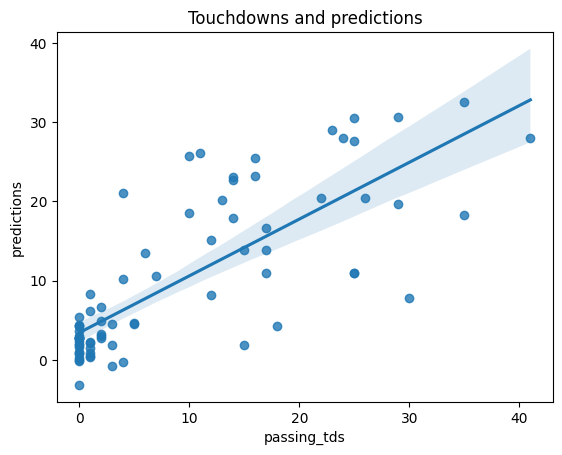

In [95]:
#visualizing the results
sns.regplot(data=test_data, x=target, y='predictions')
plt.title("Touchdowns and predictions")
plt.show()

In [96]:
# Plotting the top 10 actual touchdowns vs predictions
test_data.loc[:, ['season', 'passer_player_id', 'passer_player_name', target, 'predictions']].sort_values(target, ascending=False).head(10)

,season,passer_player_id,passer_player_name,passing_tds,predictions
296,2022,00-0033873,P.Mahomes,41.0,27.934339
338,2022,00-0036442,J.Burrow,35.0,32.590382
310,2022,00-0034857,J.Allen,35.0,18.248467
265,2022,00-0030565,G.Smith,30.0,7.829233
262,2022,00-0029604,K.Cousins,29.0,30.646245
284,2022,00-0033106,J.Goff,29.0,19.666267
247,2022,00-0023459,A.Rodgers,26.0,20.357485
245,2022,00-0019596,T.Brady,25.0,30.565355
345,2022,00-0036971,T.Lawrence,25.0,11.008852
334,2022,00-0036355,J.Herbert,25.0,27.576734


# aggregating career totals to increase the accuracy of the model

In [97]:
# Sort by player and season to ensure correct cumulative calculation
qb_stats_sorted = qb_stats.sort_values(['passer_player_id', 'season'])

# Define the raw stats columns for which we want to calculate cumulative previous season totals
raw_stats_to_accumulate = [
    'complete_pass', 'interception', 'sack',
    'yards_gained', 'passing_tds', 'attempts'
]

# Create a new DataFrame based on the sorted qb_stats
new_qb_stats_career_prev = qb_stats_sorted.copy()

# --- Calculate cumulative sums of raw stats for all PREVIOUS seasons ---
# Group by player, calculate cumulative sum, then shift by 1 to get the sum of all prior seasons
for col in raw_stats_to_accumulate:
    cumulative_col_name = f'{col}_career_cumulative'
    # Calculate cumulative sum up to and including the current season
    new_qb_stats_career_prev[cumulative_col_name] = new_qb_stats_career_prev.groupby('passer_player_id')[col].cumsum()
    # Shift to get the sum of all seasons *before* the current one
    new_qb_stats_career_prev[f'{col}_prev'] = new_qb_stats_career_prev.groupby('passer_player_id')[cumulative_col_name].shift(1)
    # Drop the intermediate cumulative column
    new_qb_stats_career_prev.drop(columns=[cumulative_col_name], inplace=True)


# --- Calculate derived _prev stats based on the aggregated _prev raw stats ---
# For a player's first season, these _prev stats will be NaN, which is appropriate.

# comp_pct_prev
new_qb_stats_career_prev['comp_pct_prev'] = round(
    new_qb_stats_career_prev['complete_pass_prev'] / new_qb_stats_career_prev['attempts_prev'] * 100, 1
)

# ypa_prev
new_qb_stats_career_prev['ypa_prev'] = round(
    new_qb_stats_career_prev['yards_gained_prev'] / new_qb_stats_career_prev['attempts_prev'], 1
)

# td_int_ratio_prev (adding 1 to interception_prev in denominator to match original logic)
new_qb_stats_career_prev['td_int_ratio_prev'] = round(
    new_qb_stats_career_prev['passing_tds_prev'] / (new_qb_stats_career_prev['interception_prev'] + 1), 2
)

# td_rate_prev
new_qb_stats_career_prev['td_rate_prev'] = round(
    new_qb_stats_career_prev['passing_tds_prev'] / new_qb_stats_career_prev['attempts_prev'], 3
)

# int_rate_prev
new_qb_stats_career_prev['int_rate_prev'] = round(
    new_qb_stats_career_prev['interception_prev'] / new_qb_stats_career_prev['attempts_prev'], 3
)

# Display a sample of the new DataFrame
# The columns for _prev stats will be NaN for the first season of each player
new_qb_stats_career_prev.sample(10)

,season,passer_player_id,passer_player_name,complete_pass,interception,sack,yards_gained,passing_tds,attempts,comp_pct,...,interception_prev,sack_prev,yards_gained_prev,passing_tds_prev,attempts_prev,comp_pct_prev,ypa_prev,td_int_ratio_prev,td_rate_prev,int_rate_prev
6,2020,00-0023459,A.Rodgers,372.0,5.0,20.0,4117.0,48.0,543,68.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,2023,00-0033921,C.Godwin,0.0,0.0,0.0,0.0,0.0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,2020,00-0030279,K.Allen,0.0,0.0,0.0,0.0,0.0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,2023,00-0034855,B.Mayfield,364.0,10.0,40.0,3814.0,28.0,609,59.8,...,29.0,105.0,8094.0,53.0,1341.0,56.6,6.0,1.77,0.040,0.022
336,2022,00-0036389,J.Hurts,306.0,6.0,38.0,3470.0,22.0,499,61.3,...,13.0,39.0,4002.0,22.0,620.0,55.2,6.5,1.57,0.035,0.021
240,2021,00-0036946,K.Mond,2.0,0.0,0.0,5.0,0.0,3,66.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,2021,00-0026625,B.Hoyer,9.0,0.0,0.0,227.0,1.0,11,81.8,...,1.0,2.0,112.0,0.0,26.0,57.7,4.3,0.00,0.000,0.038
408,2023,00-0034438,L.Woodside,3.0,1.0,1.0,20.0,0.0,5,60.0,...,0.0,0.0,7.0,0.0,3.0,33.3,2.3,0.00,0.000,0.000
244,2021,00-0037013,Z.Wilson,213.0,11.0,44.0,1966.0,9.0,429,49.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,2023,00-0033936,C.Beathard,40.0,0.0,6.0,322.0,1.0,60,66.7,...,1.0,10.0,779.0,6.0,127.0,59.1,6.1,3.00,0.047,0.008


# Using the model to predict 2024 Touchdowns

In [98]:
# Then, use qb_stats_career_prev to create model_data
model_data = new_qb_stats_career_prev.dropna(subset=features + [target]).copy()

# Train on all data prior to 2024
train_data = model_data[model_data['season'] < 2024].copy()

# Test on 2024 data
test_data = model_data[model_data['season'] == 2024].copy()

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

#running some statistics on the model to see how well it performed
rmse = mean_squared_error(test_data[target], test_data['predictions'])**0.5
r2 = pearsonr(test_data[target], test_data['predictions'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 8.676478888099107
r2: 0.5507554893451884


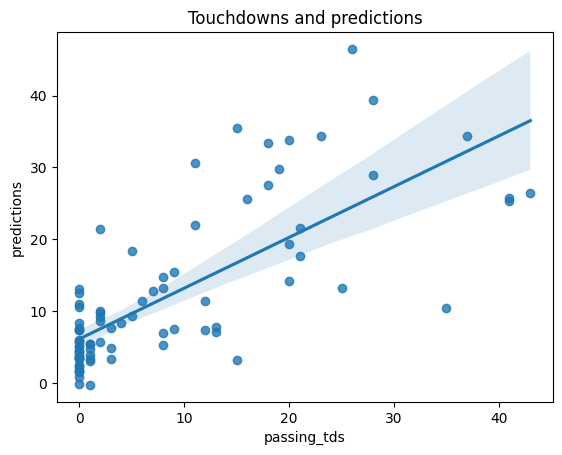

In [99]:
#visualizing the results
sns.regplot(data=test_data, x=target, y='predictions')
plt.title("Touchdowns and predictions")
plt.show()

In [100]:
# Plotting the top 10 actual touchdowns vs predictions
test_data.loc[:, ['season', 'passer_player_name', target, 'predictions']].sort_values(target, ascending=False).head(10)

,season,passer_player_name,passing_tds,predictions
544,2024,J.Burrow,43.0,26.399491
525,2024,B.Mayfield,41.0,25.718376
522,2024,L.Jackson,41.0,25.292201
503,2024,J.Goff,37.0,34.341773
527,2024,S.Darnold,35.0,10.408467
478,2024,A.Rodgers,28.0,28.946513
526,2024,J.Allen,28.0,39.348572
511,2024,P.Mahomes,26.0,46.505267
539,2024,J.Love,25.0,13.202008
542,2024,J.Herbert,23.0,34.333411


# Predicting 2025 Touchdowns

In [104]:
# Then, use qb_stats_career_prev to create model_data
model_data = new_qb_stats_career_prev.dropna(subset=features + [target]).copy()

# Train on all data prior to 2024
train_data = model_data[model_data['season'] <= 2024].copy()

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

# For the sake of relavance removing players that I know will probably not start/play in 2025 
players_to_remove = ['D.Carr', 'A.Rodgers', 'K.Cousins']

test_data = test_data[~test_data['passer_player_name'].isin(players_to_remove)]

# Plotting the top 10 predictions vs actual touchdowns
test_data.loc[:, ['season', 'passer_player_name', target, 'predictions']].sort_values('predictions', ascending=False).head(10)

,season,passer_player_name,passing_tds,predictions
511,2024,P.Mahomes,26.0,39.481053
526,2024,J.Allen,28.0,30.958245
542,2024,J.Herbert,23.0,30.407018
503,2024,J.Goff,37.0,29.296990
481,2024,M.Stafford,20.0,28.580825
485,2024,R.Wilson,16.0,26.688753
502,2024,D.Prescott,11.0,26.339491
544,2024,J.Burrow,43.0,25.428280
538,2024,T.Tagovailoa,19.0,24.592276
543,2024,J.Hurts,18.0,24.212817


# Note this data frame does not show the accuracy of the model but instead shows 2025 predictions